In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('housing.csv')

In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
data.dropna(inplace=True)

In [11]:
#data.info()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [17]:
train_data = X_train.join(y_train)
train_data.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9649,-120.83,37.07,16.0,3736.0,761.0,1942.0,730.0,2.5598,INLAND,120200.0
17043,-122.28,37.49,25.0,7335.0,1157.0,2626.0,1049.0,6.5475,NEAR OCEAN,500001.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

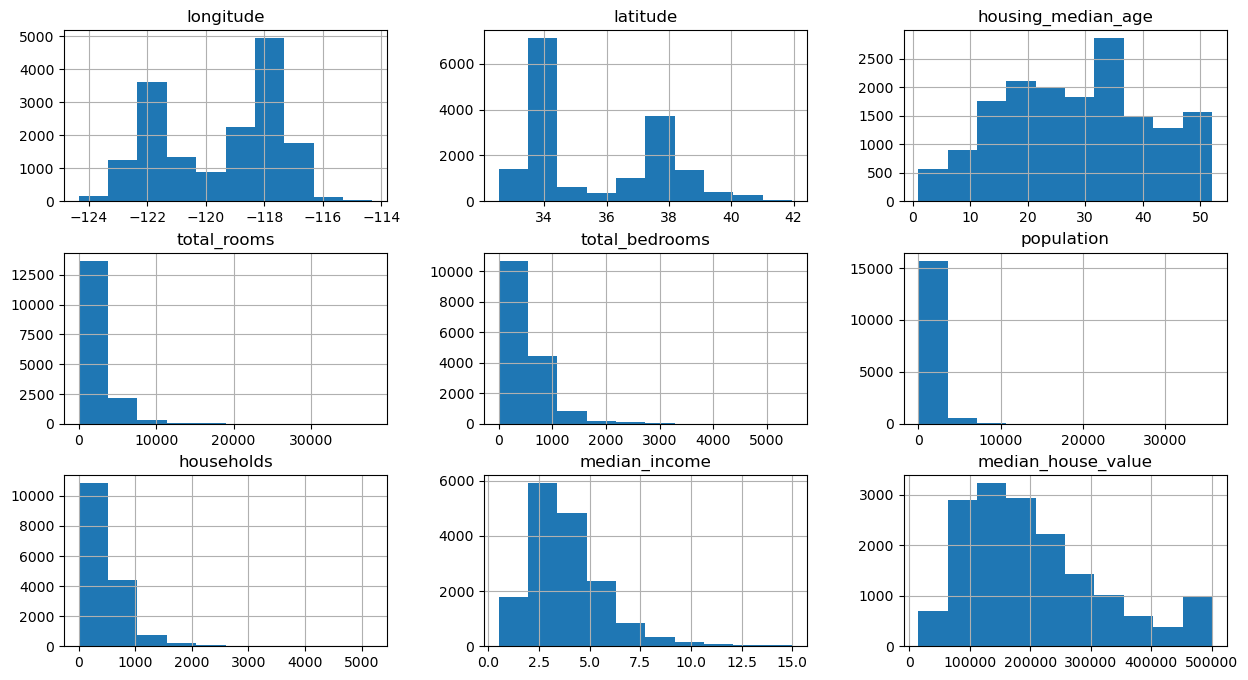

In [19]:
train_data.hist(figsize=(15,8))

<AxesSubplot:>

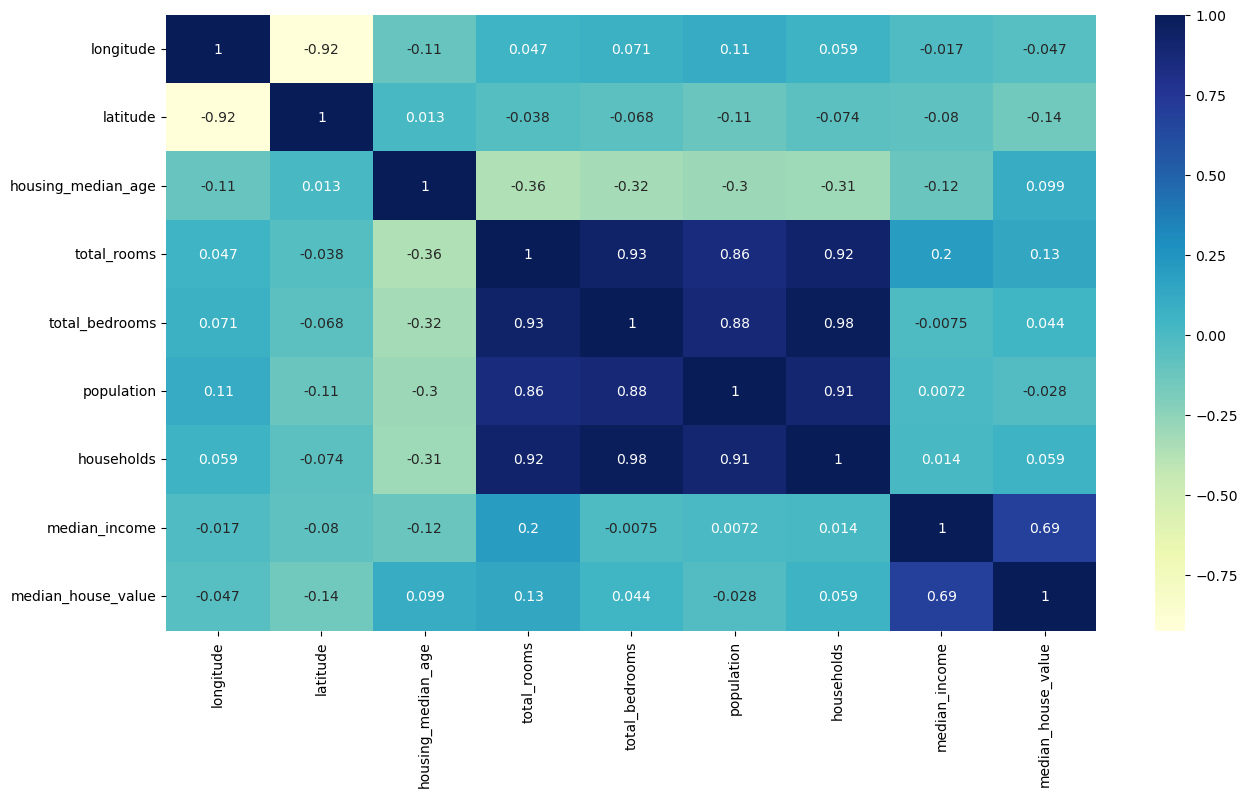

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

### PRE-PROCESSING

In [23]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

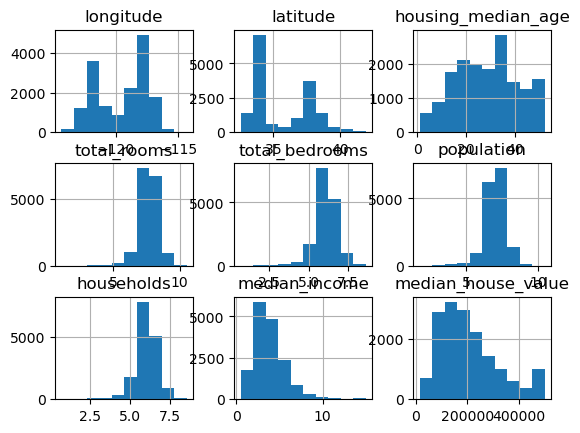

In [24]:
train_data.hist()

In [25]:
#OCEAN PROXIMITY
train_data.ocean_proximity.value_counts()
#We will create new features for all of these and give them either 1 or 0

<1H OCEAN     7222
INLAND        5204
NEAR OCEAN    2122
NEAR BAY      1794
ISLAND           4
Name: ocean_proximity, dtype: int64

In [27]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity))

In [28]:
train_data.drop('ocean_proximity',axis=1,inplace=True)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9649,-120.83,37.07,16.0,8.226038,6.635947,7.571988,6.594413,2.5598,120200.0,0,1,0,0,0
17043,-122.28,37.49,25.0,8.900549,7.054450,7.873598,6.956545,6.5475,500001.0,0,0,0,0,1
18522,-122.05,36.97,16.0,8.120886,6.416732,7.380256,6.322565,4.2542,294100.0,0,0,0,0,1
1171,-121.58,39.50,29.0,7.574558,5.950643,6.830874,5.823046,2.1658,57600.0,0,1,0,0,0
18535,-122.01,36.97,52.0,6.825460,5.313206,6.265301,5.579730,2.9444,232800.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7444,-118.19,33.95,42.0,7.745003,6.530878,7.867106,6.513230,2.7206,162100.0,1,0,0,0,0
11923,-117.39,33.95,36.0,7.230563,5.598422,6.395262,5.572154,3.1667,122900.0,0,1,0,0,0
5320,-118.42,34.05,38.0,8.494743,7.027315,7.437795,6.843750,4.8304,500001.0,1,0,0,0,0
13703,-117.23,34.12,18.0,7.272398,5.768321,6.551080,5.739793,2.1071,73500.0,0,1,0,0,0


<AxesSubplot:>

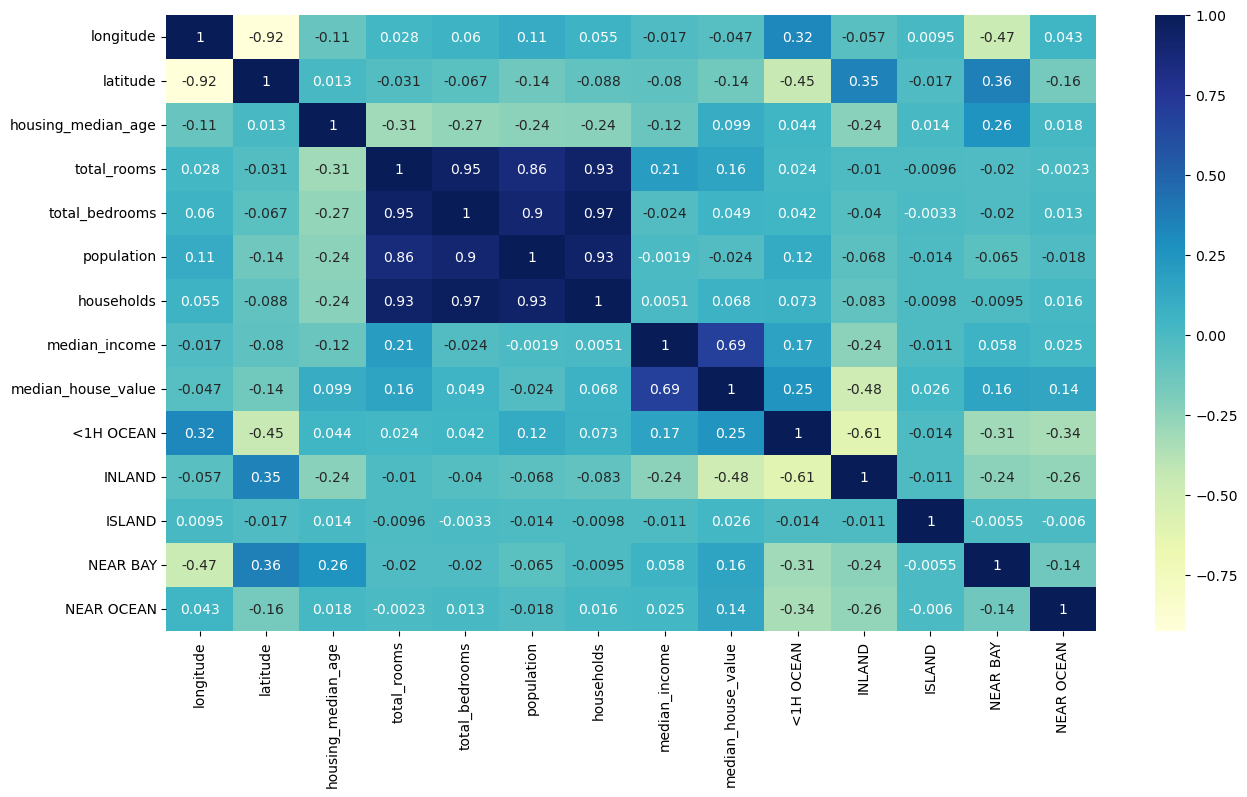

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

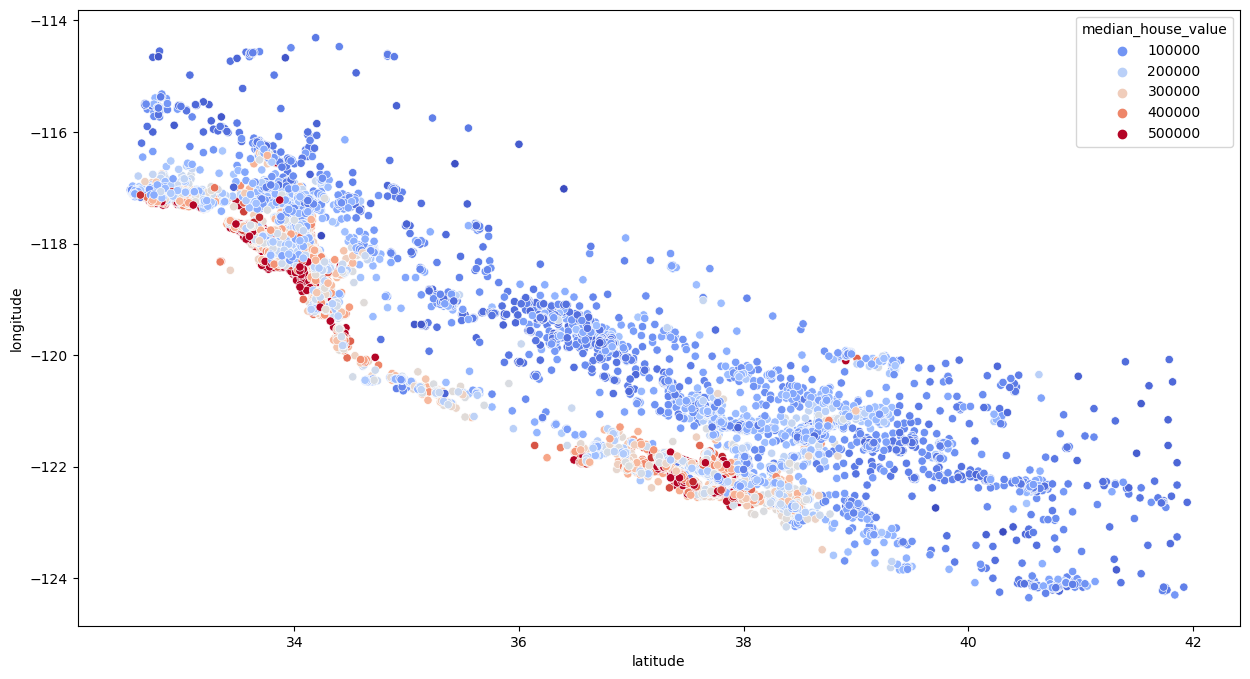

In [30]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [32]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data["household_rooms"] = train_data['total_rooms']/train_data['households']

<AxesSubplot:>

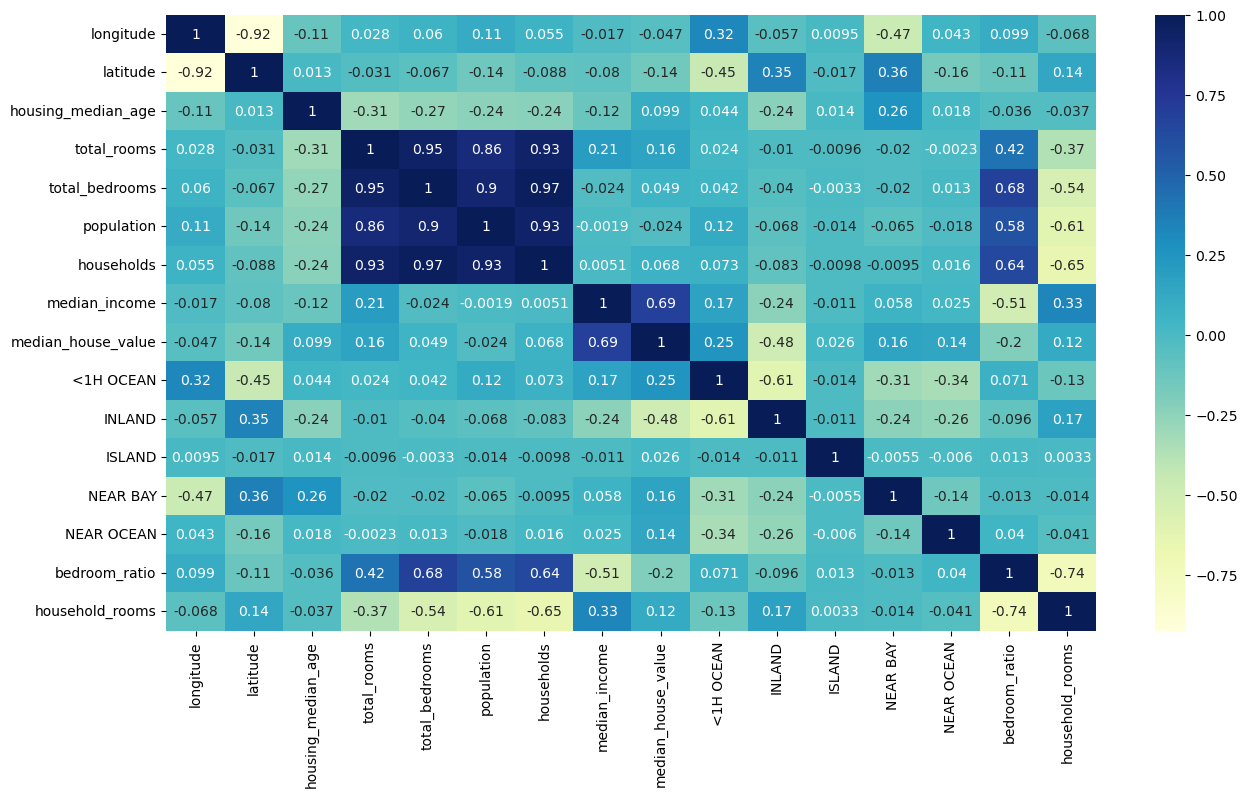

In [33]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train,y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value'] 
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s,y_train)

LinearRegression()

In [36]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity))

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data["household_rooms"] = test_data['total_rooms']/test_data['households']

In [41]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
17681,-121.87,37.29,18.0,7.545918,6.343880,6.882437,6.317165,2.3715,<1H OCEAN,228000.0,1,0,0,0,0,0.840704,1.194510
3315,-122.78,38.97,11.0,8.551788,6.879356,7.670895,6.675823,3.0466,INLAND,97300.0,0,1,0,0,0,0.804435,1.281009
6254,-117.96,34.03,35.0,7.392648,5.805135,7.288244,5.746203,3.9803,<1H OCEAN,152600.0,1,0,0,0,0,0.785258,1.286527
6849,-118.14,34.06,37.0,7.200425,5.556828,6.561031,5.476464,4.7569,<1H OCEAN,253800.0,1,0,0,0,0,0.771736,1.314795
12373,-116.45,33.80,9.0,8.618847,7.095893,7.733684,6.916715,3.6161,INLAND,99100.0,0,1,0,0,0,0.823300,1.246090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,-117.87,33.91,16.0,7.797702,6.122493,6.925595,6.167516,4.2188,<1H OCEAN,176300.0,1,0,0,0,0,0.785166,1.264318
16037,-122.46,37.72,45.0,7.783224,6.040255,7.111512,5.991465,4.0855,NEAR OCEAN,244100.0,0,0,0,0,1,0.776061,1.299052
20255,-119.17,34.22,29.0,8.340217,6.705639,7.931644,6.673298,4.1949,NEAR OCEAN,197100.0,0,0,0,0,1,0.804013,1.249789
5159,-118.28,33.96,39.0,6.783325,5.402677,6.548219,5.247024,1.8472,<1H OCEAN,99100.0,1,0,0,0,0,0.796464,1.292795


In [44]:
test_data.drop(['ocean_proximity'],axis=1,inplace=True)

In [49]:
X_test,y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value'] 

In [50]:
reg.score(X_test,y_test)

0.680613085309353